In [1]:
import CMGDB

from interval import interval

import matplotlib
import time

The Morse graph and Morse sets are computed using an adaptive scheme, where an initial subdivision of phase space is used to compute an initial Morse decomposition and then the resulting Morse sets are further subdivided and refined. During this process the Morse graph edges are not recomputed outiside the Morse sets being refined, so the final Morse graph may have spurious edges. Below we illustrate this with an example.

The Morse decomposition computation uses four parameters: (1) The initial subdivision level (`subdiv_init`) used to compute the initial Morse decompostion (the default value is 0). (2) The minimal subdivision level (`subdiv_min`) which defines the minimum subdivision level of all Morse sets computed (needs to be supplied by the user). (3) The maximum subdivision level (`subdiv_max`) which defines the maximal subdivision level used to try to determine if a Morse set is spurious (needs to be supplied by the user). (4) The subdivision limit (`subdiv_limit`) which defines the maximum number of grid elements allowed when refining a Morse set to try to determine if it is spurious (the default value is 10,000).

Let's define a map `f` to be used in the examples.

In [2]:
# Define map f
def f(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

# Map without padding

Define a box map computed using the vertices of the rectangles without padding the images.

In [3]:
# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)

## Default initial subdivision

Let's compute the Morse decomposition and Morse graph with the default initial dubdivision.

In [4]:
subdiv_min = 6
subdiv_max = 8
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, lower_bounds, upper_bounds, F)

In [5]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 8.28 ms, sys: 706 µs, total: 8.99 ms
Wall time: 8.73 ms


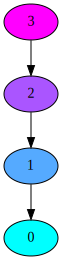

In [6]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

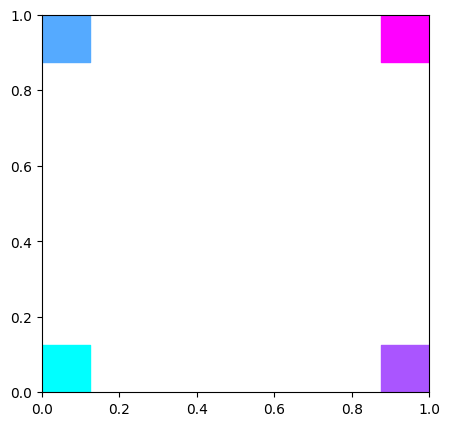

In [7]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

The Morse sets are correctly computed, but the Morse graph have a spurious edge from 2 to 1 (see below for the correct Morse graph).

## Setting the initial subdivision

Let's now choose the initial subdvision, `subdiv_init`, to be larger than 1 to see if we get the correct Morse graph.

In [8]:
subdiv_min = 6
subdiv_max = 8
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [9]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 12 ms, sys: 1.22 ms, total: 13.2 ms
Wall time: 22.4 ms


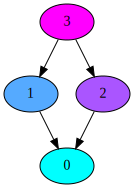

In [10]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

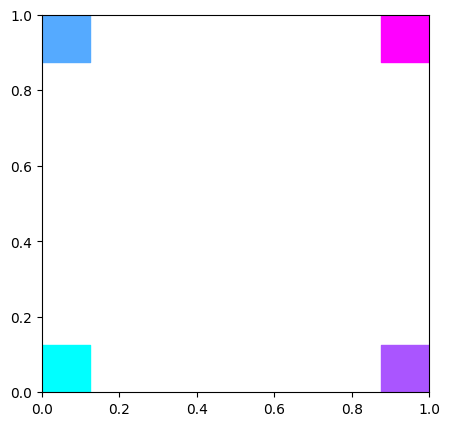

In [11]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

We now get the correct Morse graph.

# Map with padding

We can also define a box map with padding. Notice that this alters the Morse sets and the Morse graph for coarser grids.

In [12]:
# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

In [13]:
subdiv_min = 6
subdiv_max = 8
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [14]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 21.7 ms, sys: 2.57 ms, total: 24.3 ms
Wall time: 33.7 ms


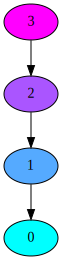

In [15]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

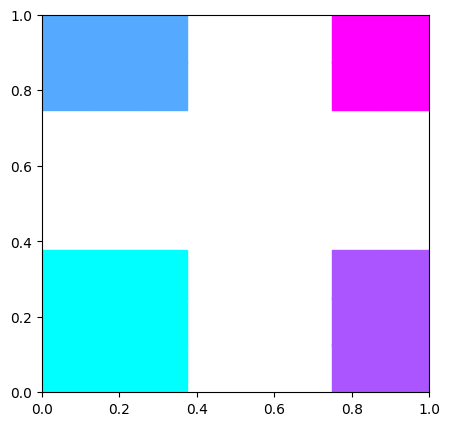

In [16]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

# Using a uniform grid

We can also choose only one level of subdivisions, in which case this value is used for the initial, minimum and maximum levels.

In [17]:
phase_subdiv = 8
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [18]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 17.8 ms, sys: 855 µs, total: 18.6 ms
Wall time: 21.5 ms


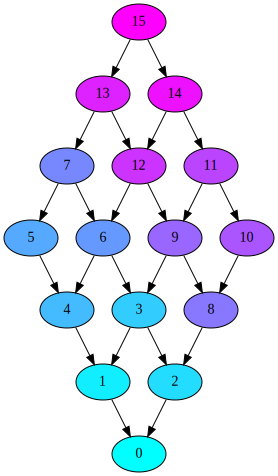

In [19]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

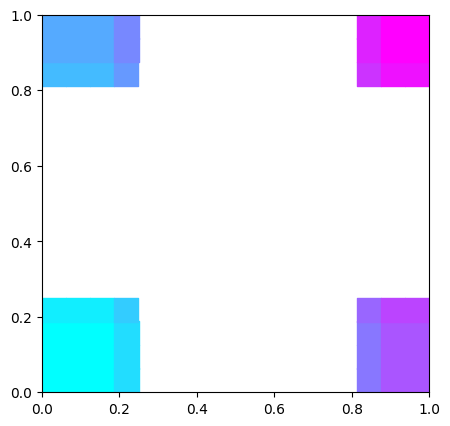

In [20]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

The resulting Morse decompostion is not good using this settings. A better option to compute on a uniform grid is to set the initial and the minimum levels of subdivisions to be the same, but setting a larger value for the maximum level.

In [21]:
subdiv_min = 8
subdiv_max = 16
subdiv_init = 8
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [22]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 60.6 ms, sys: 3.42 ms, total: 64 ms
Wall time: 74.6 ms


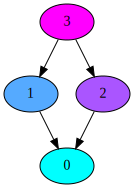

In [23]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

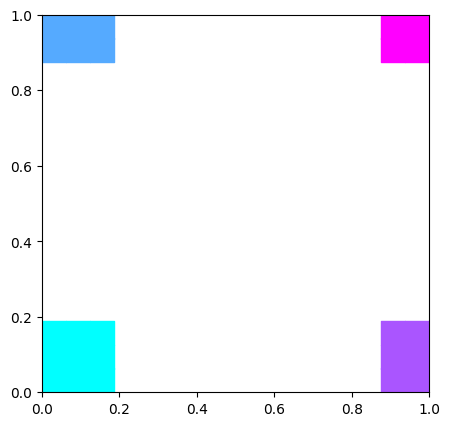

In [24]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

# Interval arithmetic

One option to make sure that the box map is computed correctly is to use interval arithmetic.

In [25]:
# Define interval box map for f
def F(rect):
    # Get endpoints defining rect
    x1, y1, x2, y2 = rect
    # Define interval box x
    x = [interval[x1, x2], interval[y1, y2]]
    # Evaluate f as an interval map
    y = f(x)
    # Get endpoints of y
    # y[0] is the first variable interval
    # y[1] is the second variable interval
    x1, x2 = y[0][0].inf, y[0][0].sup
    y1, y2 = y[1][0].inf, y[1][0].sup
    return [x1, y1, x2, y2]

In [26]:
subdiv_min = 6
subdiv_max = 8
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [27]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 41.9 ms, sys: 2.58 ms, total: 44.4 ms
Wall time: 56.5 ms


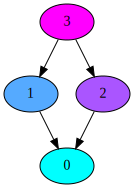

In [28]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

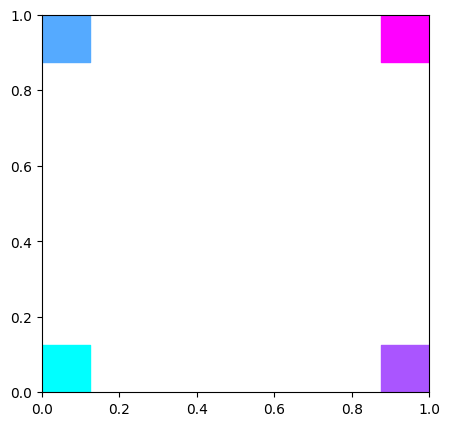

In [29]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)